In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Base de datos de la temperatura de la Tierra. Base de datos obtenida de Kaggle (https://www.kaggle.com/sachinsarkar/climate-change-global-temperature-data)

In [2]:
file_path="tablas_ini/Kaggledata_GlobalTemperatures.csv"
data_GobalTemp=pd.read_csv(file_path,converters={"dt":pd.to_datetime})

data_GobalTemp.rename(columns={"dt": "fecha","LandAverageTemperature": "Temp. promedio (tierra)",
                               "LandAverageTemperatureUncertainty":"Error Temp. (tierra)",
                               "LandMaxTemperature":"Temp. max. (tierra)", 
                               "LandMaxTemperatureUncertainty":"Error temp. max (tierra)",
                               "LandMinTemperature":"Temp. min (tierra)",
                               "LandMinTemperatureUncertainty":"Error temp. min (tierra)",
                               "LandAndOceanAverageTemperature":"Temp. promedio (tierra y oceano)",
                               "LandAndOceanAverageTemperatureUncertainty":"Error temp. (tierra y oceano)"}
                      ,inplace=True)

data_GobalTemp=data_GobalTemp.set_index("fecha")

In [10]:
data_GobalTemp

,Temp. promedio (tierra),Error Temp. (tierra),Temp. max. (tierra),Error temp. max (tierra),Temp. min (tierra),Error temp. min (tierra),Temp. promedio (tierra y oceano),Error temp. (tierra y oceano)
fecha,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062


In [3]:
data_GobalTemp.describe()

,Temp. promedio (tierra),Error Temp. (tierra),Temp. max. (tierra),Error temp. max (tierra),Temp. min (tierra),Error temp. min (tierra),Temp. promedio (tierra y oceano),Error temp. (tierra y oceano)
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


array([[<AxesSubplot:title={'center':'Temp. promedio (tierra)'}>,
        <AxesSubplot:title={'center':'Temp. max. (tierra)'}>],
       [<AxesSubplot:title={'center':'Temp. min (tierra)'}>,
        <AxesSubplot:title={'center':'Temp. promedio (tierra y oceano)'}>]],
      dtype=object)

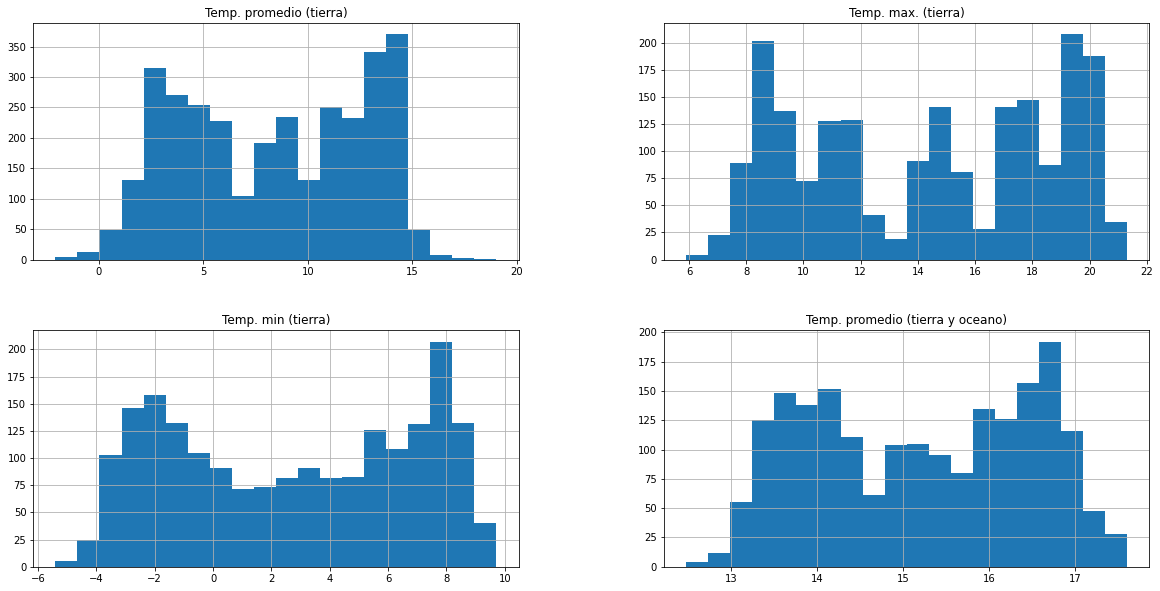

In [4]:
data_GobalTemp.hist(column=["Temp. promedio (tierra)","Temp. max. (tierra)",
                           "Temp. min (tierra)","Temp. promedio (tierra y oceano)"],bins=20, figsize=(20, 10))

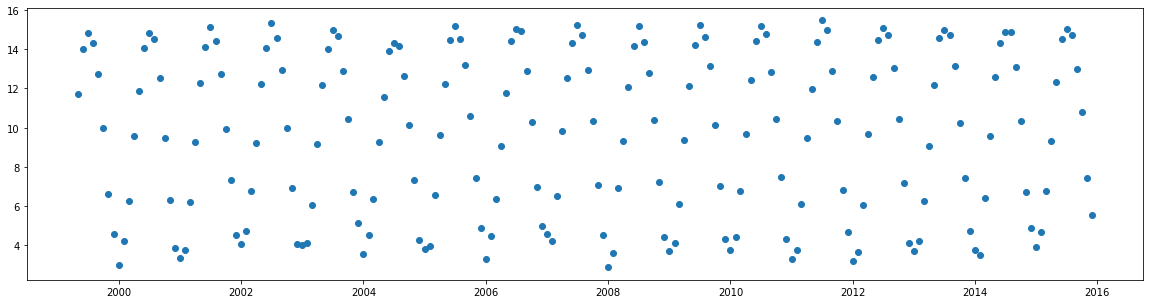

In [11]:
temp=data_GobalTemp.reset_index()

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(20,5),sharex=False)

ax.scatter(temp["fecha"][-200:],temp["Temp. promedio (tierra)"][-200:])